In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../illegal_dumping_daily.csv")

In [6]:
df

,day,cnt
0,2016-01-10,1
1,2016-01-11,43
2,2016-01-12,40
3,2016-01-13,40
4,2016-01-14,32
...,...,...
3524,2025-09-14,17
3525,2025-09-15,118
3526,2025-09-16,101
3527,2025-09-17,99


In [7]:
df['day'] = pd.to_datetime(df['day'])
df = df.sort_values('day')

In [9]:
print(df.head())
print(df.tail())
print(df.isna().sum())

         day  cnt
0 2016-01-10    1
1 2016-01-11   43
2 2016-01-12   40
3 2016-01-13   40
4 2016-01-14   32
            day  cnt
3524 2025-09-14   17
3525 2025-09-15  118
3526 2025-09-16  101
3527 2025-09-17   99
3528 2025-09-18   49
day    0
cnt    0
dtype: int64


In [10]:
# set daily index (fill missing days with 0)
ts = (df.set_index('day')['cnt']
        .asfreq('D', fill_value=0))

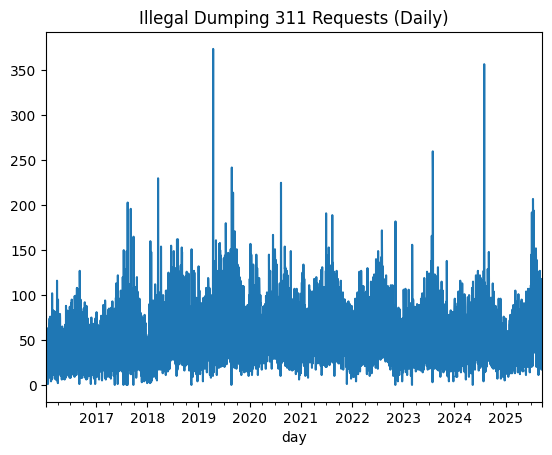

In [13]:
# quick plots
ts.plot(title='Illegal Dumping 311 Requests (Daily)')
plt.show()

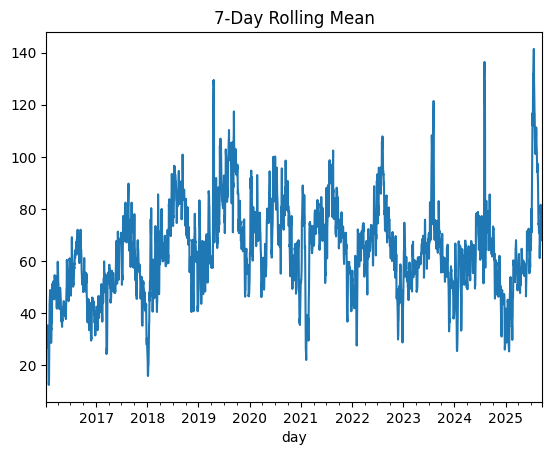

In [14]:
ts.rolling(7).mean().plot(title='7-Day Rolling Mean')
plt.show()

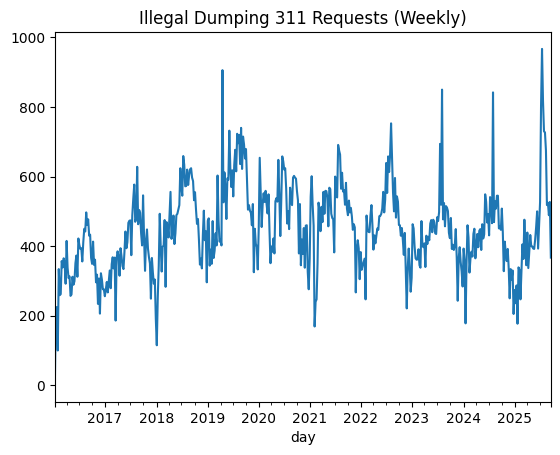

In [15]:
# aggregate to weekly (often smoother for forecasting)
ts_w = ts.resample('W').sum()
ts_w.plot(title='Illegal Dumping 311 Requests (Weekly)')
plt.show()

Filtered data contains 2449 rows from 2019-01-01 to 2025-09-18


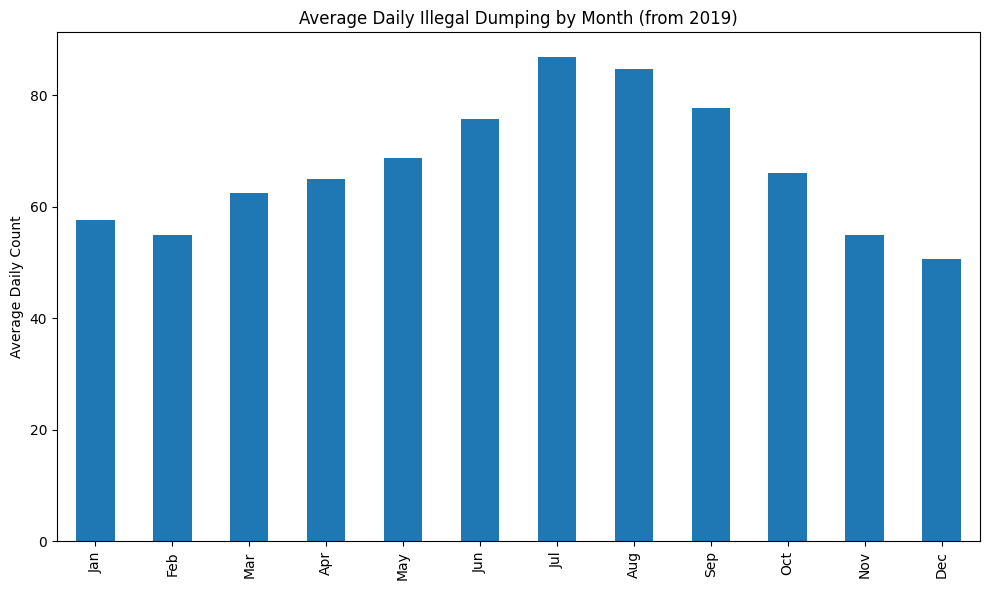

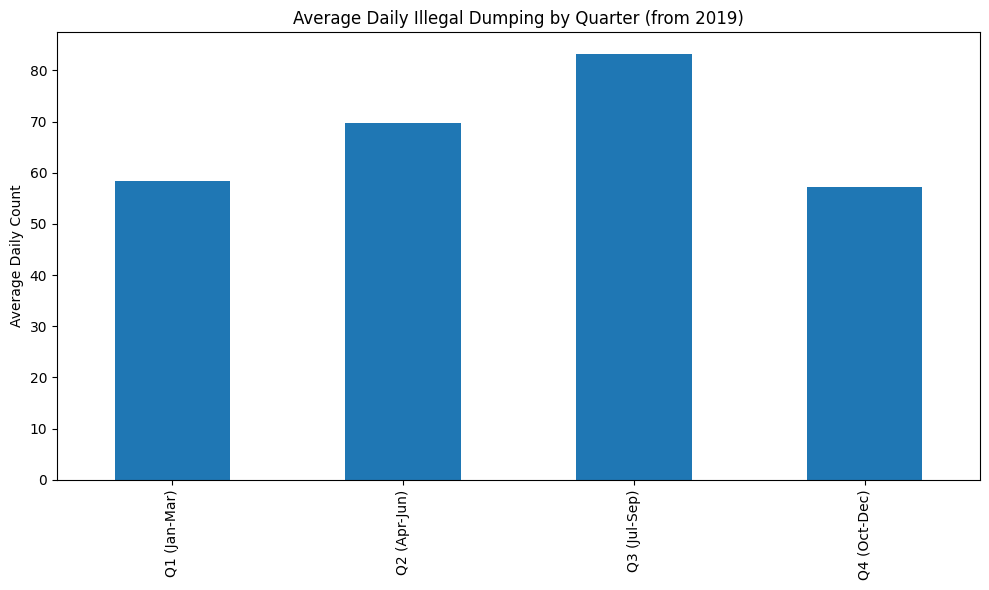

In [18]:
# Filter data from January 2019 onwards
df_filtered = df[df['day'] >= '2019-01-01']

# Display the filtered dataframe
print(f"Filtered data contains {len(df_filtered)} rows from {df_filtered['day'].min().date()} to {df_filtered['day'].max().date()}")

ts_filtered = (df_filtered.set_index('day')['cnt']
               .asfreq('D', fill_value=0))

# Create a month-based seasonal view
# Group by month and calculate average count per month
monthly_avg = ts_filtered.groupby(ts_filtered.index.month).mean()
monthly_avg.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg.plot(kind='bar', figsize=(10, 6), title='Average Daily Illegal Dumping by Month (from 2019)')
plt.ylabel('Average Daily Count')
plt.tight_layout()
plt.show()

# Create a seasonal view by quarter
quarterly_avg = ts_filtered.groupby(ts_filtered.index.quarter).mean()
quarterly_avg.index = ['Q1 (Jan-Mar)', 'Q2 (Apr-Jun)', 'Q3 (Jul-Sep)', 'Q4 (Oct-Dec)']
quarterly_avg.plot(kind='bar', figsize=(10, 6), title='Average Daily Illegal Dumping by Quarter (from 2019)')
plt.ylabel('Average Daily Count')
plt.tight_layout()
plt.show()